In [34]:
# branching from host_logs_process_chanU-working_DL-perf3-Copy1-UL-BE

In [35]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import os
import time
import threading
import math
import matplotlib.pyplot as plt
import numpy as np
import statistics
import bisect
from decimal import Decimal
import sys
import os
import pandas as pd



MAC_match = "c4:4b:d1:80:5:e8"
MAC_match_with_zero = "c4:4b:d1:80:05:e8"
MAC_match_first_three = "c4:4b:d1"  

# Mode 0 => cumulative energy measurements from start to the end. Provides only one value of energy measurements.
# Mode 1 => energy measurements every interval, from start to end. Provides (end-start)/INTERVAL values of measurement. NOTE: provides cumulatibe measurements, i.e., adds the current values of sleep/wake time to the previous ones
# Mode 2 => energy measurements every interval, from start to end. Provides (end-start)/INTERVAL values of measurement. NOTE: provides Indepent measurements, i.e., gets the current values of sleep/wake time during that time slot
# print(sys.argv[0]) ... host_logs_process.py
# print(sys.argv[1]) ... INDEX

set_plt_limits = 1
index = '2012_1'
identifier = 'VODL'

if len(sys.argv) < 2:
  print("file extension indexer needed .... USAGE: python host_logs_process.py <INDEX>")
  sys.exit("Values do not match")


def find(name, path):
    print("Searching for " + "host_logs_" + sys.argv[1] + ".txt" +  " @ " + path)
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)
        else:
            return 0

def cdf_plot(data):
  N = len(data)
  # sort the data in ascending order
  x = np.sort(data)
  # get the cdf values of y
  y = np.arange(N) / float(N)
  # plotting
  plt.xlabel('x-axis')
  plt.ylabel('y-axis')
    
  plt.title('CDF using sorting the data')
    
  plt.plot(x, y, marker='o')
  plt.show()
# res_1 = find("host_logs_" + sys.argv[1] + ".txt", "/home/siot_king_b/Desktop/2021_MAP/PEM/PSM2021_ac/hostapd_logs/")

# if res_1 != 0:
#   print("file with this index found, please try another index ..." + "host_logs_" + sys.argv[1] + ".txt")
#   sys.exit("Exiting")


MODE = 2
INTERVAL = .002
lines_processed = 0
class DEVICES:

    instances = []
    instances_MAC = []
    def __init__(mysillyobject, MACADDR, ASSOC=0, DISASSOC=0, LI=0, N=0, AID=0):
        mysillyobject.MACADDR = MACADDR
        mysillyobject.ASSOC = ASSOC
        mysillyobject.DISASSOC = DISASSOC
        mysillyobject.LI = LI
        mysillyobject.AID = AID
        mysillyobject.N = N
        mysillyobject.time_STA_wake = 0
        mysillyobject.time_STA_sleep = 0
        mysillyobject.time_accounted_for = ASSOC
        mysillyobject.time_accounting_complete = 0
        mysillyobject.n_beacons = 0
        mysillyobject.beacon_wakeup = 0
        mysillyobject.beacon_wakeup_ts = []
        mysillyobject.beacon_wakeup_ts_notifier = []
        mysillyobject.list_percentwakeperinterval = []
        mysillyobject.tx_timestamp = []
        mysillyobject.tx_notifier_waste = []
        mysillyobject.rx_data_timestamp = []
        mysillyobject.rx_data_notifier = []
        mysillyobject.rx_PS_timestamp = []
        mysillyobject.rx_PS_notifier = []
        mysillyobject.wake_after_PS = []
        mysillyobject.PSPOLL_after_beacon = []
        mysillyobject.NULLwakeup_after_beacon = []
        mysillyobject.NULLwakeup_after_beacon_timestamp = []
        mysillyobject.NULLwakeup_after_beacon_timestamp_chanU = []
        mysillyobject.DATA_after_beacon = []
        mysillyobject.DATA_after_beacon_timestamp = []
        mysillyobject.DATA_after_beacon_timestamp_chanU = []
        mysillyobject.DATA_after_NULL = []
        mysillyobject.DATA_after_NULL_timestamp = []
        mysillyobject.DATA_after_NULL_timestamp_chanU = []
        mysillyobject.beacon_tims_ts = []
        mysillyobject.beacon_tims_notifier = []
        mysillyobject.packet_arrival_ts = []
        mysillyobject.packet_arrival_notifier = []
        
        mysillyobject.perf_br_handle_frame_finish_ts = []
        mysillyobject.perf_dev_hard_start_xmit_ts = []
        mysillyobject.perf_swba_ts = []
        mysillyobject.perf_rx_ts = []
        mysillyobject.perf_process_buffer_ts = []
        mysillyobject.perf_tx_complete_buf_ts = []
        
        mysillyobject.perf_ath10k_br_dev_val = []
        mysillyobject.perf_ath10k_dev_swba_val = []
        mysillyobject.perf_ath10k_swba_rx_val = []
        mysillyobject.perf_ath10k_rx_tx_val = []
        mysillyobject.perf_ath10k_txcomp_val = []
        
        mysillyobject.perf_ath10k_br_dev_ts = []
        mysillyobject.perf_ath10k_dev_swba_ts = []
        mysillyobject.perf_ath10k_swba_rx_ts = []
        mysillyobject.perf_ath10k_rx_tx_ts = []
        mysillyobject.perf_ath10k_txcomp_ts = []
        
        mysillyobject.perf_ath10k_br_dev_ts_chanU = []
        mysillyobject.perf_ath10k_dev_swba_ts_chanU = []
        mysillyobject.perf_ath10k_swba_rx_ts_chanU = []
        mysillyobject.perf_ath10k_rx_tx_ts_chanU = []
        mysillyobject.perf_ath10k_txcomp_ts_chanU = []
        
        mysillyobject.curr_ps_state = 1 #0 is OFF and 1 is ON
        mysillyobject.__class__.instances.append(mysillyobject)
        mysillyobject.__class__.instances_MAC.append(MACADDR)

    def print_obj_details(obj_abc):
        print ('Hello my MACADDR is:',obj_abc.MACADDR)
        print ('Hello my ASSOC is:', obj_abc.ASSOC)
        print ('Hello my DISASSOC is:',obj_abc.DISASSOC)
        print ('Hello my LI is:', obj_abc.LI)

    @classmethod
    def printInstances(cls):
        for instance in cls.instances:
            print ("MAC: ", instance.MACADDR)
            print ("\tASSOC: ",instance.ASSOC)
            print ("\tDISASSOC: ",instance.DISASSOC)
            print ("\tLI: ",instance.LI)
            print ("\tcurr_ps_state: ",instance.curr_ps_state)
            print ("\ttime_STA_wake: ",instance.time_STA_wake)
            print ("\ttime_STA_sleep: ",instance.time_STA_sleep)
            print ("\ttime_accounted_for: ",instance.time_accounted_for)
            print ("\ttime_accounting_complete: ",instance.time_accounting_complete)
            print ("\tNumber of Beacons: ",instance.n_beacons)
            print ("\tWakeups due to LI: ",instance.beacon_wakeup)
            print ("\tAID: ",instance.AID)
            print ("\tN: ",instance.N)
            print("\n\n\n")
            # print()


def countX(lst, x): 
    count = 0
    for ele in lst: 
        if (ele == x): 
            count = count + 1
    return count 


os.system('cat host_logs_' + index + '.txt | grep \"\\[2021\\]\" > /home/sheth/Desktop/MAP/data_from_siotlab1/host_logs_filtered.txt')

# os.system('cat /home/siot_king_b/Desktop/2021_MAP/PEM/PSM2021_ac/hostapd_logs/host_logs_' + sys.argv[1] + '.txt | grep \"\\[2021\\]\" > /home/siot_king_b/Desktop/2021_MAP/PEM/PSM2021_ac/hostapd_logs/host_logs_filtered_' + sys.argv[1] + '.txt')




# Using readlines() 
file1 = open('host_logs_filtered.txt', 'r') 
Lines = file1.readlines() 

count = 0
# Strips the newline character 
for i in range(0, len(Lines)):
    line = Lines[i]
    # print("Line{}: {}".format(count, line.strip())) 
    substring = "ADD"
    if substring in line:
        # print ((line.split(' ')[3]).split('\n')[0])
        # checking if the next line has LI
        substring = "LI"
        if substring in Lines[i+1] and "AID" in Lines[i+3]:
          DEVICES((line.split(' ')[3]).split('\n')[0], ASSOC =  (float)(line.split(':')[0]), N=countX(DEVICES.instances_MAC, (line.split(' ')[3]).split('\n')[0]), LI =(float)(Lines[i+1].split('=')[1]), AID =(int)(Lines[i+3].split('=')[1]))
        else:
          DEVICES((line.split(' ')[3]).split('\n')[0], ASSOC =  (float)(line.split(':')[0]), N=countX(DEVICES.instances_MAC, (line.split(' ')[3]).split('\n')[0]))
        # print(DEVICES.instances_MAC)
        # print("ASSOC time: ", (float)(line.split(':')[0]))
        # print(countX(DEVICES.instances_MAC, (line.split(' ')[3]).split('\n')[0]))          
    substring = "DEL_STATION"
    if substring in line:
      substring = "Success"
      if substring in line:
        # print("found ", substring)
        # print("found ", (float)(line.split(':')[0]))
        # print(line.split(' ')[4])
        for i in DEVICES.instances:
          # print(i.MACADDR)
          if(line.split(' ')[4] == i.MACADDR):
            j = i
            # print("found!!")
        # print("----->", j.MACADDR, j.N)
        # print((float)(line.split(':')[0]))
        j.DISASSOC = (float)(line.split(':')[0])

DEVICES.printInstances()

print(DEVICES.instances_MAC)

for i in DEVICES.instances:
  print(i.MACADDR)
# for i in DEVICES.instances:
#     if (i.MACADDR=='a4:08:ea:d9:d5:20'):
#         i.AID = 13
#     if (i.MACADDR == 'a4:08:ea:d9:c7:d8'):
#         print(i.AID)
#         i.AID = 3
#         print(i.AID)
# for i in DEVICES.instances:
#     print(i.MACADDR)
#     print(i.AID)
# for i in DEVICES.instances:
#     if (i.MACADDR=='a4:08:ea:d9:d5:20'):
#         i.AID = 13
#     if (i.MACADDR == 'a4:08:ea:d9:c7:d8'):
#         print(i.AID)
#         i.AID = 3
#         print(i.AID)

MAC:  a4:08:ea:d9:c7:6a
	ASSOC:  1625449431.664337
	DISASSOC:  0
	LI:  10.0
	curr_ps_state:  1
	time_STA_wake:  0
	time_STA_sleep:  0
	time_accounted_for:  1625449431.664337
	time_accounting_complete:  0
	Number of Beacons:  0
	Wakeups due to LI:  0
	AID:  1
	N:  0




MAC:  a4:08:ea:b9:42:50
	ASSOC:  1625449431.863828
	DISASSOC:  0
	LI:  10.0
	curr_ps_state:  1
	time_STA_wake:  0
	time_STA_sleep:  0
	time_accounted_for:  1625449431.863828
	time_accounting_complete:  0
	Number of Beacons:  0
	Wakeups due to LI:  0
	AID:  2
	N:  0




MAC:  98:f1:70:6f:80:ee
	ASSOC:  1625449431.869524
	DISASSOC:  0
	LI:  10.0
	curr_ps_state:  1
	time_STA_wake:  0
	time_STA_sleep:  0
	time_accounted_for:  1625449431.869524
	time_accounting_complete:  0
	Number of Beacons:  0
	Wakeups due to LI:  0
	AID:  3
	N:  0




MAC:  a4:08:ea:d9:c7:24
	ASSOC:  1625449432.071773
	DISASSOC:  0
	LI:  10.0
	curr_ps_state:  1
	time_STA_wake:  0
	time_STA_sleep:  0
	time_accounted_for:  1625449432.071773
	time_accounting

(1, 2, 2, 1, 2, 1)
RIGHT
(2, 3, 3, 2, 3, 2)
RIGHT
(3, 4, 4, 3, 4, 3)
RIGHT
(4, 5, 5, 4, 5, 4)
RIGHT
(5, 6, 6, 5, 6, 5)
RIGHT
(6, 7, 7, 6, 7, 6)
RIGHT
(7, 8, 9, 7, 8, 7)
RIGHT
(8, 9, 11, 8, 9, 8)
RIGHT
(9, 10, 13, 9, 10, 9)
RIGHT
(10, 11, 15, 10, 11, 10)
RIGHT
(11, 12, 17, 11, 12, 11)
RIGHT
(12, 13, 19, 12, 13, 12)
RIGHT
(13, 14, 20, 13, 14, 13)
RIGHT
(14, 15, 21, 14, 15, 14)
RIGHT
(15, 16, 22, 15, 16, 15)
RIGHT
(16, 17, 23, 16, 17, 16)
RIGHT
(17, 18, 25, 17, 18, 17)
RIGHT
(18, 19, 27, 18, 19, 18)
RIGHT
(19, 20, 29, 19, 20, 19)
RIGHT
(20, 21, 31, 20, 21, 20)
RIGHT
(21, 22, 33, 21, 22, 21)
RIGHT
(22, 23, 35, 22, 23, 22)
RIGHT
(23, 24, 36, 23, 24, 23)
RIGHT
(24, 25, 37, 24, 25, 24)
RIGHT
(25, 26, 38, 25, 26, 25)
RIGHT
(26, 27, 39, 26, 27, 26)
RIGHT
(27, 28, 40, 27, 28, 27)
RIGHT
(28, 29, 41, 28, 29, 28)
RIGHT
(29, 30, 43, 29, 30, 29)
RIGHT
(30, 31, 45, 30, 31, 30)
RIGHT
(31, 32, 47, 31, 32, 31)
RIGHT
(32, 33, 51, 32, 33, 32)
RIGHT
(33, 34, 55, 33, 34, 33)
RIGHT
(34, 35, 56, 34, 35, 34)
RI

RIGHT
(240, 241, 372, 233, 241, 240)
RIGHT
(241, 242, 374, 234, 242, 241)
RIGHT
(242, 243, 378, 235, 243, 242)
RIGHT
(243, 244, 380, 236, 244, 243)
RIGHT
(244, 245, 381, 237, 245, 244)
RIGHT
(245, 246, 382, 238, 246, 245)
RIGHT
(246, 247, 382, 238, 247, 246)
RIGHT
(247, 248, 383, 239, 248, 247)
RIGHT
(248, 249, 385, 240, 249, 248)
RIGHT
(249, 250, 387, 241, 250, 249)
RIGHT
(250, 251, 387, 241, 251, 250)
RIGHT
(251, 252, 389, 242, 252, 251)
RIGHT
(252, 253, 391, 243, 253, 252)
RIGHT
(253, 254, 392, 244, 254, 253)
RIGHT
(254, 255, 393, 245, 255, 254)
RIGHT
(255, 256, 394, 246, 256, 255)
RIGHT
(256, 257, 395, 247, 257, 256)
RIGHT
(257, 258, 396, 248, 258, 257)
RIGHT
(258, 259, 398, 249, 259, 258)
RIGHT
(259, 260, 400, 250, 260, 259)
RIGHT
(260, 261, 402, 251, 261, 260)
RIGHT
(261, 262, 408, 252, 262, 261)
RIGHT
(262, 263, 408, 252, 263, 262)
RIGHT
(263, 264, 409, 253, 264, 263)
RIGHT
(264, 265, 410, 254, 265, 264)
RIGHT
(265, 266, 411, 255, 266, 265)
RIGHT
(266, 267, 412, 256, 267, 266)
R

RIGHT
(469, 470, 765, 452, 469, 468)
RIGHT
(470, 471, 766, 453, 470, 469)
RIGHT
(471, 472, 767, 454, 471, 470)
RIGHT
(472, 473, 768, 455, 472, 471)
RIGHT
(473, 474, 769, 456, 473, 472)
RIGHT
(474, 475, 771, 457, 474, 473)
RIGHT
(475, 476, 773, 458, 475, 474)
RIGHT
(476, 477, 775, 459, 476, 475)
RIGHT
(477, 478, 777, 460, 477, 476)
RIGHT
(478, 479, 779, 461, 478, 477)
RIGHT
(479, 480, 781, 462, 479, 478)
RIGHT
(480, 481, 782, 463, 480, 479)
RIGHT
(481, 482, 783, 464, 481, 480)
RIGHT
(482, 483, 784, 465, 482, 481)
RIGHT
(483, 484, 785, 466, 483, 482)
RIGHT
(484, 485, 786, 467, 484, 483)
RIGHT
(485, 486, 787, 468, 485, 484)
RIGHT
(486, 487, 789, 469, 486, 485)
RIGHT
(487, 488, 791, 470, 487, 486)
RIGHT
(488, 489, 793, 471, 488, 487)
RIGHT
(489, 490, 795, 472, 489, 488)
RIGHT
(490, 491, 797, 473, 490, 489)
RIGHT
(491, 492, 799, 474, 491, 490)
RIGHT
(492, 493, 801, 475, 492, 491)
RIGHT
(493, 494, 802, 476, 493, 492)
RIGHT
(494, 495, 803, 477, 494, 493)
RIGHT
(495, 496, 804, 478, 495, 494)
R

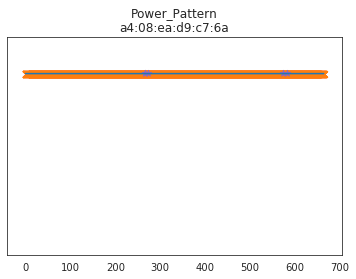

0


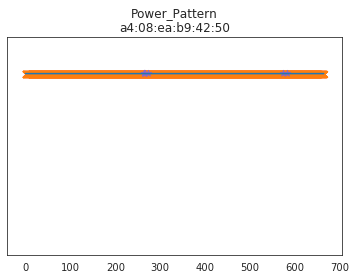

0


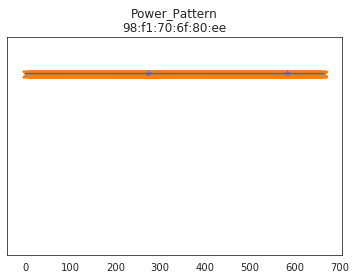

0


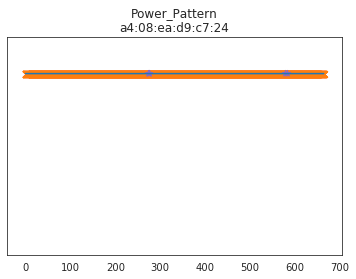

0


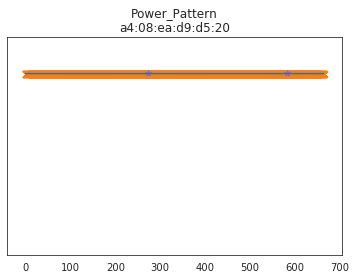

0


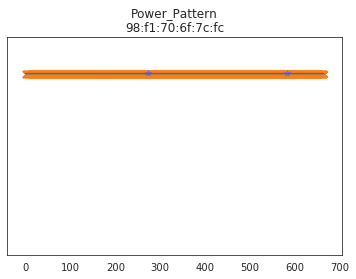

659


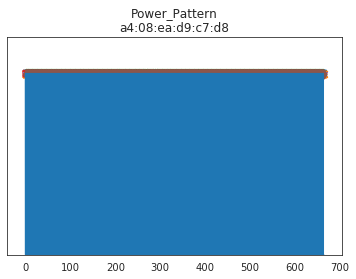

a4:08:ea:d9:c7:6a
1

a4:08:ea:b9:42:50
2

98:f1:70:6f:80:ee
3

a4:08:ea:d9:c7:24
4

a4:08:ea:d9:d5:20
0

98:f1:70:6f:7c:fc
5

a4:08:ea:d9:c7:d8
7



In [36]:
file1 = open('kern_logs_ebpf'+ index + '.txt', 'r') 
# file1 = open('/home/siot_king_b/Desktop/2021/PSM2021_ac/kern_logs/kern_logs.txt', 'r') 
Lines = file1.readlines() 

count = 0

# ba_wake= 0
# ba_sleep=0
# ba_ps_state = OFF
# ba_accounted_for = ba_associated 
# ba_associated = 0 


with open('kern_logs_ebpf' + index + '.txt', "r") as file:
# with open('/home/siot_king_b/Desktop/2021/PSM2021_ac/kern_logs/kern_logs.txt', "r") as file:
    first_line = file.readline()
    for last_line in file:
        pass
exp_start_time = (float)(first_line.split(' ')[0])
exp_end_time = (float)(last_line.split(' ')[0])



# def periodic_energy_measurment1 (start_time, end_time):
#   for h in range(0, len(Lines)):
#       line = Lines[h]
#       print(line)
#       if ((float)(line.split(' ')[0]) > start_time) and ((float)(line.split(' ')[0]) < end_time):
#         substring = "ath10k_process_rx"
#         if substring in line:
#           print(line)
#           last_line_time = (float)(line.split(' ')[0])
#           for i in DEVICES.instances:
#             substring = i.MACADDR
#             if i.time_accounting_complete == 0:
#               if i.DISASSOC != 0 and (((float)(line.split(' ')[0])) - i.DISASSOC > 0):
#                 i.time_accounting_complete = 1
#                 print("Done accounting _for : ", i.MACADDR, "... ", i.N, i.time_accounting_complete)
#             if substring in line and i.time_accounting_complete == 0 :
#               # print("The line: ", line, " concerns with :", i.MACADDR)
#               line_time = (float)(line.split(' ')[0])
#               # print(line_time)
#               if ":PM 00" in line:#station waking up
#                 if i.curr_ps_state == 1:
#                   # print(i.MACADDR, "[", i.N, "]" " is waking up ", "was awake for : ")
#                   i.time_STA_wake = i.time_STA_wake+ (line_time - i.time_accounted_for)
#                   i.time_accounted_for = line_time
#                   i.curr_ps_state = 1
#                 elif i.curr_ps_state == 0:
#                   # print(i.MACADDR, "[", i.N, "]" " is waking up ", "was asleep")
#                   i.time_STA_sleep = i.time_STA_sleep + (line_time - i.time_accounted_for)
#                   i.time_accounted_for = line_time
#                   i.curr_ps_state = 1
#               elif  ":PM 1000" in line:#station going to sleep
#                 if i.curr_ps_state == 1:
#                   # print(i.MACADDR, "[", i.N, "]" " is going to sleep ", "was awake")
#                   i.time_STA_wake = i.time_STA_wake + (line_time - i.time_accounted_for)
#                   i.time_accounted_for = line_time
#                   i.curr_ps_state = 0
#                 elif i.curr_ps_state == 0:
#                   # print(i.MACADDR, "[", i.N, "]" " is going to sleep ", "was asleep")
#                   i.time_STA_sleep = i.time_STA_sleep + (line_time - i.time_accounted_for)
#                   i.time_accounted_for = line_time
#                   i.curr_ps_state = 0
#               else:
#                 print("Not right")
#   print("++++++++++++++++++++++++++++++++++")
#   DEVICES.printInstances()
#   print("----------------------------------")



def periodic_energy_measurment (start_time, end_time):
  global lines_processed
  # print(lines_processed, len(Lines))
  for h in range(lines_processed, len(Lines)):
      line = Lines[h]
      # print("----------1")
      # print(line, "a", start_time,"b", end_time, "c")
      # print("----------2")
      if((float)(line.split(' ')[0]) > end_time):
        # print("break")
        break
      if ((float)(line.split(' ')[0]) > start_time) and ((float)(line.split(' ')[0]) < end_time):
#         print(line)
        substring = "ath10k_process_rx"
        if substring in line:
          # print("ath10k_process_rx")
          last_line_time = (float)(line.split(' ')[0])
          # logging the UPlink packets from the devices
          if "3::ftype 8 ::4::stype 80" in line: #data packets
            for i in DEVICES.instances:
              substring = i.MACADDR.strip()
              if substring in line and i.time_accounting_complete == 0 :
                i.rx_data_timestamp.append((float)(line.split(' ')[0]))
                i.rx_data_notifier.append(100.8)
                # DATA_after_beacon
#                 if (len(i.rx_data_timestamp)>1 and len(i.beacon_wakeup_ts)>1 and len(i.rx_PS_timestamp)>1):
#                     i.DATA_after_beacon.append(i.rx_data_timestamp[-1] - (i.beacon_wakeup_ts[-1]))
#                     i.DATA_after_beacon_timestamp.append(i.rx_data_timestamp[-1])
#                     i.DATA_after_NULL.append(i.rx_data_timestamp[-1] - float(i.rx_PS_timestamp[-1]))
#                     i.DATA_after_NULL_timestamp.append(i.rx_PS_timestamp[-1])
#                     print("1:", i.rx_data_timestamp[-1], " ... ", i.beacon_wakeup_ts[-1])
          if ("3::ftype 8 ::4::stype 40" in line) or ("3::ftype 4 ::4::stype a0" in line): #PSM packets
            # print("PSM packets")
            for i in DEVICES.instances:
              substring = i.MACADDR.strip()
              # print("devices mac :", substring)
              # print("line ", line)
              # print("i.time_accounting_complete ", i.time_accounting_complete)
              if substring in line and i.time_accounting_complete == 0 :
                # print("found substring")
                i.rx_PS_timestamp.append((Decimal)(line.split(' ')[0]))
                i.rx_PS_notifier.append(100.6)
                if ("3::ftype 4 ::4::stype a0" in line):
                  if (len(i.rx_PS_timestamp)>1 and len(i.beacon_wakeup_ts)>1):
                    i.PSPOLL_after_beacon.append(i.rx_PS_timestamp[-1] - (Decimal)(i.beacon_wakeup_ts[-1]))
#                 if ("3::ftype 8 ::4::stype 40" in line):
#                   print(line)  
#                   if (len(i.rx_PS_timestamp)>1 and len(i.beacon_wakeup_ts)>1):
#                     i.NULLwakeup_after_beacon.append(i.rx_PS_timestamp[-1] - (Decimal)(i.beacon_wakeup_ts[-1]))
#                     i.NULLwakeup_after_beacon_timestamp.append(i.rx_PS_timestamp[-1])
          # 
          last_line_time = (float)(line.split(' ')[0])
          # 
          for i in DEVICES.instances:
            substring = i.MACADDR.strip()
            if i.time_accounting_complete == 0:
              if i.DISASSOC != 0 and (((float)(line.split(' ')[0])) - i.DISASSOC > 0):
                i.time_accounting_complete = 1
                # print("Done accounting _for : ", i.MACADDR, "... ", i.N, i.time_accounting_complete)
            if substring in line and i.time_accounting_complete == 0 :
              # print("The line: ", line, " concerns with :", i.MACADDR)
              line_time = (float)(line.split(' ')[0])
              # print(line_time)
              if ":PM 0" in line:#station waking up
                if i.curr_ps_state == 1:
                  # print(i.MACADDR, "[", i.N, "]" " is waking up ", "was awake for : ")
                  i.time_STA_wake = i.time_STA_wake+ (line_time - i.time_accounted_for)
                  i.time_accounted_for = line_time
                  i.curr_ps_state = 1
                elif i.curr_ps_state == 0:
                  # print(i.MACADDR, "[", i.N, "]" " is waking up ", "was asleep")
                  i.perf_rx_ts.append(line_time)
                  i.time_STA_sleep = i.time_STA_sleep + (line_time - i.time_accounted_for)
                  i.time_accounted_for = line_time
                  i.curr_ps_state = 1
                  if (len(i.beacon_wakeup_ts)>1):
                    i.NULLwakeup_after_beacon.append(line_time - (float)(i.beacon_wakeup_ts[-1]))
                    i.NULLwakeup_after_beacon_timestamp.append(line_time)
              elif  ":PM 1000" in line:#station going to sleep
                if i.curr_ps_state == 1:
                  # print(i.MACADDR, "[", i.N, "]" " is going to sleep ", "was awake")
                  i.time_STA_wake = i.time_STA_wake + (line_time - i.time_accounted_for)
                  i.time_accounted_for = line_time
                  i.curr_ps_state = 0
                elif i.curr_ps_state == 0:
                  # print(i.MACADDR, "[", i.N, "]" " is going to sleep ", "was asleep")
                  i.time_STA_sleep = i.time_STA_sleep + (line_time - i.time_accounted_for)
                  i.time_accounted_for = line_time
                  i.curr_ps_state = 0
              else:
                print("Not right")
        elif "br_handle_frame_finish" in line:
          for i in DEVICES.instances:
            substring = i.MACADDR
            if substring in line and i.time_accounting_complete == 0 :
                i.perf_br_handle_frame_finish_ts.append((float)(line.split(' ')[0]))
        elif "dev_hard_start_xmit" in line:
          for i in DEVICES.instances:
            substring = i.MACADDR
            if substring in line and i.time_accounting_complete == 0 :
                i.perf_dev_hard_start_xmit_ts.append((float)(line.split(' ')[0]))
        elif "ath_tx_txqaddbuf" in line:
          for i in DEVICES.instances:
            substring = i.MACADDR
            if substring in line and i.time_accounting_complete == 0 :
                i.perf_process_buffer_ts.append((float)(line.split(' ')[0]))
        elif "ath_tx_complete_buf" in line:
          # print("ath_tx_complete_buf")
#           print(line)
          for i in DEVICES.instances:
            substring = i.MACADDR
            if substring in line and i.time_accounting_complete == 0 :
              i.perf_tx_complete_buf_ts.append((float)(line.split(' ')[0]))
              # print((line.split(' ')[0]))
              # print((Decimal)(line.split(' ')[0]))
              # print("%.4f" % (float)(line.split(' ')[0]))
              i.tx_timestamp.append((Decimal)(line.split(' ')[0]))
              i.tx_notifier_waste.append(100.4)
              if (len(i.tx_timestamp)>1 and len(i.beacon_wakeup_ts)>1 and len(i.rx_PS_timestamp)>1):
                # print(i.tx_timestamp[-1])
                # print(i.rx_PS_timestamp[-1])
                i.DATA_after_beacon.append(float(i.tx_timestamp[-1]) - float(i.beacon_wakeup_ts[-1]))
                i.DATA_after_beacon_timestamp.append(i.tx_timestamp[-1])
                i.DATA_after_NULL.append(float(i.tx_timestamp[-1]) - float(i.rx_PS_timestamp[-1]))
                i.DATA_after_NULL_timestamp.append(i.rx_PS_timestamp[-1])
#                 i.wake_after_PS.append(i.tx_timestamp[-1] - i.rx_PS_timestamp[-1])
                # print(i.wake_after_PS[-1])
              if (len(i.perf_br_handle_frame_finish_ts)>1 
                  and len(i.perf_dev_hard_start_xmit_ts)>1 
                  and len(i.perf_swba_ts)>1
                  and len(i.perf_rx_ts)>1 
                  and len(i.perf_process_buffer_ts)>1
                  and len(i.perf_tx_complete_buf_ts)>1):
#                 print("TODO")
                print("RIGHT")
                print((len(i.perf_br_handle_frame_finish_ts),len(i.perf_dev_hard_start_xmit_ts),
              len(i.perf_swba_ts),
              len(i.perf_rx_ts), 
              len(i.perf_process_buffer_ts),
              len(i.perf_tx_complete_buf_ts)))
                i.perf_ath10k_br_dev_val.append(i.perf_dev_hard_start_xmit_ts[-1] - i.perf_br_handle_frame_finish_ts[-1])
                i.perf_ath10k_dev_swba_val.append(i.perf_swba_ts[-1] - i.perf_dev_hard_start_xmit_ts[-1])
                i.perf_ath10k_swba_rx_val.append(i.perf_rx_ts[-1] - i.perf_swba_ts[-1])
                i.perf_ath10k_rx_tx_val.append(i.perf_process_buffer_ts[-1] - i.perf_rx_ts[-1])
                i.perf_ath10k_txcomp_val.append(i.perf_tx_complete_buf_ts[-1] - i.perf_process_buffer_ts[-1])
                
                i.perf_ath10k_br_dev_ts.append(i.perf_br_handle_frame_finish_ts[-1])
                i.perf_ath10k_dev_swba_ts.append(i.perf_dev_hard_start_xmit_ts[-1])
                i.perf_ath10k_swba_rx_ts.append(i.perf_swba_ts[-1])
                i.perf_ath10k_rx_tx_ts.append(i.perf_rx_ts[-1])
                i.perf_ath10k_txcomp_ts.append(i.perf_process_buffer_ts[-1])
              else:
                print((len(i.perf_br_handle_frame_finish_ts),len(i.perf_dev_hard_start_xmit_ts),
              len(i.perf_swba_ts),
              len(i.perf_rx_ts), 
              len(i.perf_process_buffer_ts),
              len(i.perf_tx_complete_buf_ts)))
              # bisect.bisect(a, x)
        elif "ath10k_wmi_event_host_swba" in line:
#           print(line)
          temp_tim = line.split("bitmap: ")[1]
          # print(temp_tim)
#           print(((":" + temp_tim.rstrip().strip() + ":")))
          temp_tim_hex = str(bin(int(temp_tim.rstrip().strip(),16))[2:])
          # print("temp_tim_hex", temp_tim_hex)
          for i in DEVICES.instances:
            i.beacon_wakeup_ts.append((float)(line.split(' ')[0]))
            i.beacon_wakeup_ts_notifier.append(100)
            # print((i.AID))
            if isinstance(i.AID, int) == True and len(temp_tim_hex) > i.AID and i.time_accounting_complete == 0 :
              # print("1...",i.MACADDR, i.AID)
              if (temp_tim_hex[-(i.AID+1)] == '1') or (temp_tim.rstrip().strip() == '40'):
                # print("2...", temp_tim_hex, -(i.AID+1),i.MACADDR, i.AID)
            # if "bitmap: 2" in line:
                i.beacon_tims_ts.append((float)(line.split(' ')[0]))
                i.beacon_tims_notifier.append(100.2)
                i.perf_swba_ts.append((float)(line.split(' ')[0]))
#               else:
#                 print("+++++++++++++")
# #                 print("temp_tim.rstrip().strip()", temp_tim.rstrip().strip())
#                 print("temp_tim_hex", temp_tim_hex)
#                 print("(i.AID+1)", (i.AID+1))
#                 print("temp_tim_hex[-(i.AID+1)]", temp_tim_hex[-(i.AID+1)])
        elif "__sta_info_recalc_tim" in line:
          # print("__sta_info_recalc_tim")
          for i in DEVICES.instances:
            substring = i.MACADDR
            if substring in line and i.time_accounting_complete == 0 :
              i.packet_arrival_ts.append((float)(line.split(' ')[0]))
              i.packet_arrival_notifier.append(99.8)
        lines_processed = lines_processed +1
  for I in DEVICES.instances:
    if end_time > I.time_accounted_for and I.time_accounting_complete == 0:
      if I.curr_ps_state == 0:
        I.time_STA_sleep = I.time_STA_sleep + (end_time - I.time_accounted_for)
      elif I.curr_ps_state == 1:
        I.time_STA_wake = I.time_STA_wake + (end_time - I.time_accounted_for)
      I.time_accounted_for = end_time
  # bEACONS:
  for I in DEVICES.instances:
    I.n_beacons = (int)((end_time - start_time)/.1024)
    if (I.LI>0):
      I.beacon_wakeup = (int)(I.n_beacons/I.LI) 
    if((I.time_STA_wake + I.time_STA_sleep)>0):
      I.list_percentwakeperinterval.append((int)(I.time_STA_wake/(I.time_STA_wake + I.time_STA_sleep)*100))
    else:
      I.list_percentwakeperinterval.append(0)
  # print("++++++++++++++++++++++++++++++++++")
  # DEVICES.printInstances()
  # print("----------------------------------")
  # print("lines_processed--",lines_processed)


# def continuos_energy_measurement(start_time, end_time,INTERVAL):
#   h = 0
#   while "ath10k_process_rx" not in line:
#     h = h+1
#   line = Lines[h]
#   curr_line_time = (float)(line.split(' ')[0])
#   for t in np.arange(0, int(exp_end_time) - int(exp_start_time), INTERVAL):
#     print("***********", exp_start_time+t, "--t-->", exp_start_time + t + INTERVAL, "***********")
#     if curr_line_time < (exp_start_time+t):
#       for t1 in np.arange(0, int(curr_line_time) - int(exp_start_time+t), INTERVAL):
      



# for t in range(0, int(exp_end_time) - int(exp_start_time)):
#   print("***********", exp_start_time + t, "***********")
#   periodic_energy_measurment(exp_start_time+t, exp_start_time + t+1)
# print(first_line)
# print(last_line)





start_time_list = []


if MODE == 0:
  print("***********", exp_start_time, "--t-->", exp_end_time, "***********")
  periodic_energy_measurment(exp_start_time, exp_end_time)
if MODE == 1:
  for t in range(0, int(exp_end_time) - int(exp_start_time)):
    print("***********", exp_start_time+t, "--t-->", exp_start_time + t+1, "***********")
    periodic_energy_measurment(exp_start_time+t, exp_start_time + t+1)
# for t in range(0, int(exp_end_time) - int(exp_start_time), INTERVAL):
if MODE == 2:
  for t in np.arange(0, int(exp_end_time) - int(exp_start_time), INTERVAL):
    # print("***********", exp_start_time+t, "--t-->", exp_start_time + t + INTERVAL, "***********")
    # print(((exp_start_time + t+INTERVAL) - (exp_start_time+t)))
    if ((exp_start_time + t+INTERVAL) - (exp_start_time+t)) < 1:
      # print("calling periodic_energy_measurment")
      periodic_energy_measurment(exp_start_time+t, exp_start_time + t+INTERVAL)
      # print("lines_processed--",lines_processed)
      start_time_list.append(exp_start_time+t)
    for I in DEVICES.instances:
      I.time_STA_wake = 0
      I.time_STA_sleep = 0




for I in DEVICES.instances:
  lst = I.tx_timestamp
  lst = [float(i) for i in lst]
  I.tx_timestamp = lst

  lst = I.beacon_wakeup_ts
  lst = [float(i) for i in lst]
  I.beacon_wakeup_ts = lst
  
  lst = I.rx_data_timestamp
  lst = [float(i) for i in lst]
  I.rx_data_timestamp = lst
  
  lst = I.rx_PS_timestamp
  lst = [float(i) for i in lst]
  I.rx_PS_timestamp = lst
  
  lst = I.beacon_tims_ts
  lst = [float(i) for i in lst]
  I.beacon_tims_ts = lst
  
  lst = I.packet_arrival_ts
  lst = [float(i) for i in lst]
  I.packet_arrival_ts = lst

s = 40

for I in DEVICES.instances:
  # if I.MACADDR == "a4:08:ea:b9:45:ba":
    print(len(I.tx_timestamp))
    plt.plot(start_time_list-np.min(I.beacon_wakeup_ts), I.list_percentwakeperinterval)
    plt.scatter(I.tx_timestamp-np.min(I.beacon_wakeup_ts), I.tx_notifier_waste, marker='v',s=s)
    plt.scatter(I.beacon_wakeup_ts-np.min(I.beacon_wakeup_ts), I.beacon_wakeup_ts_notifier, marker='x',s=s)
    plt.scatter(I.rx_data_timestamp-np.min(I.beacon_wakeup_ts), I.rx_data_notifier, marker='^',s=s)
    plt.scatter(I.rx_PS_timestamp-np.min(I.beacon_wakeup_ts), I.rx_PS_notifier, marker='>',s=s)
    plt.scatter(I.beacon_tims_ts-np.min(I.beacon_wakeup_ts), I.beacon_tims_notifier, marker='*',s=s)
    plt.scatter(I.packet_arrival_ts-np.min(I.beacon_wakeup_ts), I.packet_arrival_notifier, marker='d',s=s)
    plt.ylim([0,120])
    plt.title("Power_Pattern\n" + I.MACADDR)
    # plt.title(I.MACADDR)sys.argv[1]
    if I.MACADDR == MAC_match_with_zero:
      plt.savefig(sys.argv[1] + "_Power_Pattern\n" + I.MACADDR, bbox_inches='tight')
    # plt.plot(np.array(I.beacon_wakeup_ts)-np.min(Xa), Ya, 'o')
    ax = plt.gca()
    # ax.get_xaxis().get_major_formatter().set_useOffset(False)
    plt.yticks([])
    plt.show()


    


for i in DEVICES.instances:
  print(i.MACADDR)
  print(i.AID)
  print()

In [37]:
from bisect import *
# Make sure this is the valid path to your file
# Read in the file
with open('chan_stats_' + index + '.txt', 'r') as file :
  filedata = file.read()

# Replace the target string
filedata = filedata.replace('nan', '5')

# Write the file out again
with open('chan_stats_' + index + '.txt', 'w') as file:
  file.write(filedata)


chan_stats = pd.read_csv('chan_stats_' + index + '.txt')

chan_stats.columns = ['timestamp', 'chanU','x']
chan_stats['timestamp'] = chan_stats['timestamp'] / 1000
chan_stats.replace(to_replace ="-nan", value =-5)
chan_stats = chan_stats[pd.notna(chan_stats['chanU'])]
# print(chan_stats)
chan_stats["chanU"] = pd.to_numeric(chan_stats["chanU"])


decimals = 1    
chan_stats['chanU'] = chan_stats['chanU'].apply(lambda x: round(x, decimals))
chan_stats


,timestamp,chanU,x
0,1.625449e+09,0.0,0
1,1.625449e+09,0.0,0
2,1.625449e+09,0.1,0
3,1.625449e+09,0.1,0
4,1.625449e+09,0.1,0
...,...,...,...
74818,1.625450e+09,0.7,0
74819,1.625450e+09,0.8,0
74820,1.625450e+09,0.3,0
74821,1.625450e+09,0.4,0


(1) 0
(1) 0
(1) 0
(1) 0
(1) 0
(1) 0
(1) 643
643
1625449784.4336188
1625449785.4578643
1625449786.4817345
1625449787.5057101
1625449788.5296962
1625449789.5537364
1625449790.5777364
1625449791.6018362
1625449792.6264026
1625449793.6504633
1625449794.6749504
1625449795.6991878
1625449796.5166786
1625449797.5411448
1625449798.5652251
1625449799.589285
1625449800.6134164
1625449801.6369786
1625449802.6611836
1625449803.6859033
1625449804.7100458
1625449805.7332976
1625449806.5523944
1625449807.5765908
1625449808.600429
1625449809.6241307
1625449810.6492167
1625449811.6725633
1625449812.697963
1625449813.7213678
1625449814.745395
1625449815.9734364
1625449816.996852
1625449817.6118186
1625449818.6360428
1625449819.660119
1625449820.6846852
1625449821.7078793
1625449822.7326262
1625449823.960324
1625449824.780502
1625449825.8043337
1625449826.8281553
1625449827.8521862
1625449828.8761282
1625449829.8996413
1625449830.7194905
1625449831.7441072
1625449832.9722333
1625449833.9963295
1625449834

Iteration done
I.DATA_after_beacon 658
Iteration done
I.DATA_after_NULL 658
Iteration done


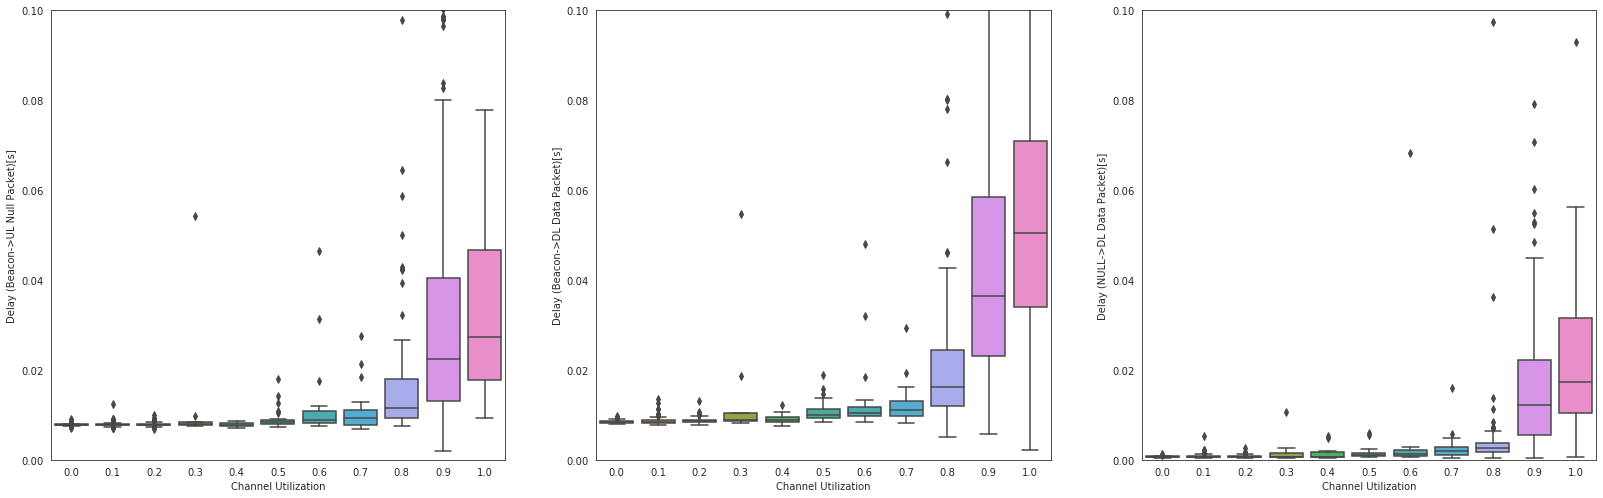

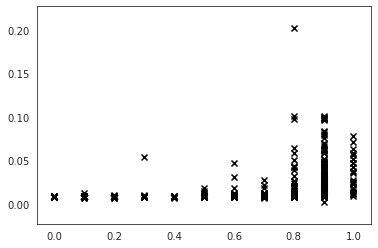

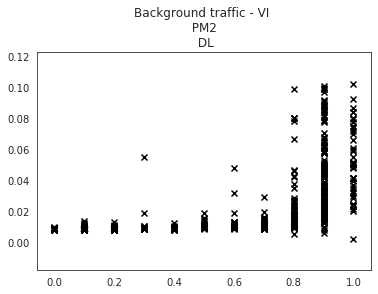

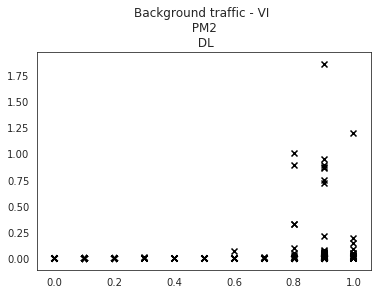

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100f, axes = plt.subplots(1, 3)% !important; }</style>"))  
f, axes = plt.subplots(1, 3)
    
    
# Null after beacon
for I in DEVICES.instances:
  print("(1)", len(I.NULLwakeup_after_beacon))
  if I.MACADDR == MAC_match_with_zero:
    fig, ax = plt.subplots()
    fig.canvas.draw()
    print(len(I.NULLwakeup_after_beacon))
    if len(I.NULLwakeup_after_beacon) > 10:
#       print("len(I.NULLwakeup_after_beacon)",len(I.NULLwakeup_after_beacon_timestamp))
#       print("I.NULLwakeup_after_beacon[1]",float(I.NULLwakeup_after_beacon_timestamp[1]))
#       print(bisect_right(chan_stats['timestamp'], float(I.NULLwakeup_after_beacon_timestamp[1])))
#       print(chan_stats.iloc[[bisect_right(chan_stats['timestamp'], float(I.NULLwakeup_after_beacon_timestamp[1]))]])
      for y in I.NULLwakeup_after_beacon_timestamp:
#         print(chan_stats.iloc[bisect_right(chan_stats['timestamp'], float(y)),1])
        print(float(y))
        I.NULLwakeup_after_beacon_timestamp_chanU.append(chan_stats.iloc[bisect_left(chan_stats['timestamp'], float(y)),1])
#       df[df['LastName'] == 'Smith'].index
#       print(len(I.NULLwakeup_after_beacon_timestamp_chanU))
#       print(len(I.NULLwakeup_after_beacon_timestamp))
#       print(len(I.NULLwakeup_after_beacon))
      ax.scatter(I.NULLwakeup_after_beacon_timestamp_chanU, I.NULLwakeup_after_beacon, marker='x', color='black', linewidths=.7)
    print("I.NULLwakeup_after_beacon",len(I.NULLwakeup_after_beacon))
    I.NULLwakeup_after_beacon_timestamp_chanU = list(map(float, I.NULLwakeup_after_beacon_timestamp_chanU))
    I.NULLwakeup_after_beacon = list(map(float, I.NULLwakeup_after_beacon))
#     I.NULLwakeup_after_beacon_timestamp_chanU = float(I.NULLwakeup_after_beacon_timestamp_chanU)
#     I.NULLwakeup_after_beacon =  float(I.NULLwakeup_after_beacon) 
#     plt.xlim([-0.03,1.03])
#     plt.show()
    xx = I.NULLwakeup_after_beacon_timestamp_chanU
    yy = I.NULLwakeup_after_beacon
   
  
    data_plot = pd.DataFrame({"xx":xx, "yy":yy})
   
    #sns.barplot(x="xx", y="yy", data=data_plot, capsize=.1, ci="sd")
#     sns.scatterplot(x = "xx", y = "yy", data=data_plot)
    #sns.swarmplot(x="xx",
    #              y="yy",
    #              data=data_plot)
    a_plot = sns.boxplot(x="xx", y="yy", data=data_plot,  orient='v' , ax=axes[0])
    a_plot.set(ylim=(0, .1))
    a_plot.set(xlabel='Channel Utilization', ylabel='Delay (Beacon->UL Null Packet)[s]')
#     cdf_plot(I.PSPOLL_after_beacon)
    print("Iteration done")





for I in DEVICES.instances:
  if I.MACADDR == MAC_match_with_zero:
    fig, ax = plt.subplots()
    fig.canvas.draw()
    if len(I.DATA_after_beacon) > 10:
#       print("len(I.NULLwakeup_after_beacon)",len(I.NULLwakeup_after_beacon_timestamp))
#       print("I.NULLwakeup_after_beacon[1]",float(I.NULLwakeup_after_beacon_timestamp[1]))
#       print(bisect_right(chan_stats['timestamp'], float(I.NULLwakeup_after_beacon_timestamp[1])))
#       print(chan_stats.iloc[[bisect_right(chan_stats['timestamp'], float(I.NULLwakeup_after_beacon_timestamp[1]))]])
      for y in I.DATA_after_beacon_timestamp:
#         print(chan_stats.iloc[bisect_right(chan_stats['timestamp'], float(y)),1])
        I.DATA_after_beacon_timestamp_chanU.append(chan_stats.iloc[bisect_left(chan_stats['timestamp'], float(y)),1])
      ax.scatter(I.DATA_after_beacon_timestamp_chanU, I.DATA_after_beacon, marker='x', color='black', linewidths=.7)
#     plt.show()
    xx = I.DATA_after_beacon_timestamp_chanU
    yy = I.DATA_after_beacon
   
    print("I.DATA_after_beacon",len(I.DATA_after_beacon))
    data_plot = pd.DataFrame({"xx":xx, "yy":yy})
   
    #sns.barplot(x="xx", y="yy", data=data_plot, capsize=.1, ci="sd")
#     sns.scatterplot(x = "xx", y = "yy", data=data_plot)
    #sns.swarmplot(x="xx",
    #              y="yy",
    #              data=data_plot)
    a_plot = sns.boxplot(x="xx", y="yy", data=data_plot,  orient='v' , ax=axes[1])
    a_plot.set(ylim=(0, .1))
    ax.set_title('Background traffic - VI \n PM2 \n DL')
    a_plot.set(xlabel='Channel Utilization', ylabel='Delay (Beacon->DL Data Packet)[s]')
    
#     plt.show()
#     cdf_plot(I.PSPOLL_after_beacon)
    print("Iteration done")
    
    

for I in DEVICES.instances:
  if I.MACADDR == MAC_match_with_zero:
    fig, ax = plt.subplots()
    fig.canvas.draw()
    if len(I.DATA_after_NULL) > 10:
#       print("len(I.NULLwakeup_after_beacon)",len(I.NULLwakeup_after_beacon_timestamp))
#       print("I.NULLwakeup_after_beacon[1]",float(I.NULLwakeup_after_beacon_timestamp[1]))
#       print(bisect_right(chan_stats['timestamp'], float(I.NULLwakeup_after_beacon_timestamp[1])))
#       print(chan_stats.iloc[[bisect_right(chan_stats['timestamp'], float(I.NULLwakeup_after_beacon_timestamp[1]))]])
      for y in I.DATA_after_NULL_timestamp:
#         print(chan_stats.iloc[bisect_right(chan_stats['timestamp'], float(y)),1])
        I.DATA_after_NULL_timestamp_chanU.append(chan_stats.iloc[bisect_left(chan_stats['timestamp'], float(y)),1])
      ax.scatter(I.DATA_after_NULL_timestamp_chanU, I.DATA_after_NULL, marker='x', color='black', linewidths=.7)
#     plt.show()
    print("I.DATA_after_NULL",len(I.DATA_after_NULL))
    xx = I.DATA_after_NULL_timestamp_chanU
    yy = I.DATA_after_NULL
   
  
    data_plot = pd.DataFrame({"xx":xx, "yy":yy})
   
    #sns.barplot(x="xx", y="yy", data=data_plot, capsize=.1, ci="sd")
#     sns.scatterplot(x = "xx", y = "yy", data=data_plot)
    #sns.swarmplot(x="xx",
    #              y="yy",
    #              data=data_plot)
    a_plot = sns.boxplot(x="xx", y="yy", data=data_plot,  orient='v' , ax=axes[2])
    a_plot.set(ylim=(0, .1))
    ax.set_title('Background traffic - VI \n PM2 \n DL')
    a_plot.set(xlabel='Channel Utilization', ylabel='Delay (NULL->DL Data Packet)[s]')
    f.set_size_inches(27.7, 8.27)
#     plt.show()
#     cdf_plot(I.PSPOLL_after_beacon)
    with open(index +'_DATA_after_NULL_timestamp_chanU.txt', 'w') as filehandle1:
        for listitem1 in I.DATA_after_NULL_timestamp_chanU:
            filehandle1.write('%f\n' % listitem1)
    with open(index +'_DATA_after_NULL.txt', 'w') as filehandle2:
        for listitem2 in I.DATA_after_NULL:
            filehandle2.write('%f\n' % listitem2)
    print("Iteration done")




In [39]:
d = {'chanU': [], 'delay': [], 'type':[]}
df = pd.DataFrame(data=d)
df1 = pd.DataFrame(data=d)
df2 = pd.DataFrame(data=d)
df3 = pd.DataFrame(data=d)
df4 = pd.DataFrame(data=d)


# bridge_to_driver
for I in DEVICES.instances:
  if I.MACADDR == MAC_match_with_zero:
#     fig, ax = plt.subplots()
#     fig.canvas.draw()
    print("----",len(I.perf_ath10k_br_dev_ts))
    if len(I.perf_ath10k_br_dev_ts) > 10:
      for y in I.perf_ath10k_br_dev_ts:
        I.perf_ath10k_br_dev_ts_chanU.append(chan_stats.iloc[bisect_left(chan_stats['timestamp'], float(y)),1])
        print(chan_stats.iloc[bisect_left(chan_stats['timestamp'], float(y)),1])
    xx = I.perf_ath10k_br_dev_ts_chanU
    yy = I.perf_ath10k_br_dev_val
    print("bridge_to_driver")
    print(len(xx))
    print(len(yy))


listOfStrings = ['bridge_to_driver' for i in range(len(xx))]
xtra = {'chanU': xx, 'delay': yy, 'type': listOfStrings}

df1 = df1.append(pd.DataFrame(xtra))
df = df.append(pd.DataFrame(xtra))

# # driver_to_TIMset
# for I in DEVICES.instances:
#   if I.MACADDR == "a4:08:ea:b9:45:ba":
#     fig, ax = plt.subplots()
#     fig.canvas.draw()
#     if len(I.perf_ath10k_dev_swba_ts) > 10:
#       for y in I.perf_ath10k_dev_swba_ts:
#         I.perf_ath10k_dev_swba_ts_chanU.append(chan_stats.iloc[bisect_left(chan_stats['timestamp'], float(y)),1])
# #       
#     xx = I.perf_ath10k_dev_swba_ts_chanU
#     yy = I.perf_ath10k_dev_swba_val

# listOfStrings = ['driver_to_TIMset' for i in range(len(xx))]
# xtra = {'chanU': xx, 'delay': yy, 'type': listOfStrings}

# df = df.append(pd.DataFrame(xtra))



# TIMset_to_NULLRx
for I in DEVICES.instances:
  if I.MACADDR == MAC_match_with_zero:
#     fig, ax = plt.subplots()
#     fig.canvas.draw()
    if len(I.perf_ath10k_swba_rx_ts) > 10:
      for y in I.perf_ath10k_swba_rx_ts:
        I.perf_ath10k_swba_rx_ts_chanU.append(chan_stats.iloc[bisect_left(chan_stats['timestamp'], float(y)+.008),1])
#       
    xx = I.perf_ath10k_swba_rx_ts_chanU
    yy = I.perf_ath10k_swba_rx_val
    print("TIMset_to_NULLRx")
    print(len(xx))
    print(len(yy))
listOfStrings = ['TIMset_to_NULLRx' for i in range(len(xx))]
xtra = {'chanU': xx, 'delay': yy, 'type': listOfStrings}

df2 = df2.append(pd.DataFrame(xtra))
df = df.append(pd.DataFrame(xtra))


# NULLRx_to_HWqueues [SW queues]
for I in DEVICES.instances:
  if I.MACADDR == MAC_match_with_zero:
#     fig, ax = plt.subplots()
#     fig.canvas.draw()
    if len(I.perf_ath10k_rx_tx_ts) > 10:
      for y in I.perf_ath10k_rx_tx_ts:
        I.perf_ath10k_rx_tx_ts_chanU.append(chan_stats.iloc[bisect_left(chan_stats['timestamp'], float(y)),1])
#       
    xx = I.perf_ath10k_rx_tx_ts_chanU
    yy = I.perf_ath10k_rx_tx_val
    print("NULLRx_to_HWqueues")
    print(len(xx))
    print(len(yy))
listOfStrings = ['NULLRx_to_HWqueues [SW queues]' for i in range(len(xx))]
xtra = {'chanU': xx, 'delay': yy, 'type': listOfStrings}

df3 = df3.append(pd.DataFrame(xtra))
df = df.append(pd.DataFrame(xtra))

# HWqueues_TxComplete [HW queues]
for I in DEVICES.instances:
  if I.MACADDR == MAC_match_with_zero:
#     fig, ax = plt.subplots()
#     fig.canvas.draw()
    if len(I.perf_ath10k_txcomp_ts) > 10:
      for y in I.perf_ath10k_txcomp_ts:
        I.perf_ath10k_txcomp_ts_chanU.append(chan_stats.iloc[bisect_left(chan_stats['timestamp'], float(y)),1])
#       
    xx = I.perf_ath10k_txcomp_ts_chanU
    yy = I.perf_ath10k_txcomp_val
    print("HWqueues_TxComplete")
    print(len(xx))
    print(len(yy))
listOfStrings = ['HWqueues_TxComplete [HW queues]' for i in range(len(xx))]
xtra = {'chanU': xx, 'delay': yy, 'type': listOfStrings}

df4 = df4.append(pd.DataFrame(xtra))
df = df.append(pd.DataFrame(xtra))


---- 658
0.2
0.2
0.0
0.0
0.1
0.0
0.2
0.2
0.1
0.0
0.1
0.0
0.2
0.1
0.0
0.1
0.0
0.1
0.1
0.0
0.0
0.1
0.1
0.1
0.1
0.0
0.1
0.0
0.0
0.2
0.1
0.0
0.1
0.0
0.1
0.2
0.3
0.0
0.3
0.1
0.0
0.1
0.2
0.0
0.0
0.0
0.1
0.1
0.2
0.0
0.0
0.0
0.0
0.1
0.2
0.2
0.1
0.0
0.1
0.2
0.2
0.1
0.2
0.2
0.2
0.2
0.1
0.2
0.1
0.2
0.1
0.8
0.8
0.8
0.0
0.8
0.3
0.3
0.7
0.8
0.4
0.2
0.5
0.3
0.2
0.3
0.5
0.2
0.4
0.7
0.0
0.1
0.2
0.1
0.0
0.5
0.5
0.7
0.6
0.7
0.8
0.5
0.7
0.6
0.5
0.4
0.8
0.8
0.7
0.8
0.8
0.7
0.7
0.7
0.6
0.9
0.8
0.8
0.9
0.8
0.8
0.8
0.9
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.0
0.2
0.0
0.0
0.0
0.0
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.9
0.8
0.8
0.8
0.8
0.8
0.8
0.1
0.0
0.0
0.1
0.1
0.9
0.9
0.9
0.9
0.9
0.8
0.9
0.9
0.9
0.9
0.9
0.8
0.9
0.9
0.9
0.1
0.2
0.0
0.0
0.0
0.9
1.0
0.9
0.9
0.9
0.9
0.9
0.8
1.0
0.9
0.9
1.0
1.0
0.9
1.0
0.6
0.2
0.8
0.8
0.6
0.9
0.9
0.9
1.0
0.9
0.8
1.0
0.9
1.0
0.9
0.9
0.8
0.9
0.9
0.9
0.2
0.2
0.2
0.2
0.0
0.9
0.9
0.9
1.0
0.9
0.9
0.9
0.9
0.9
0.9
1.0
0.9
1.0
1.0
0.8
0.0
0.6
0.7
0.1
0.0
0.0
0.9
0.9
0.9
0.9
0.9
0.8
0.8
1.0
0.9
1.0
0.9

In [40]:
df_11 = df[df['type'] == 'bridge_to_driver']

In [41]:
len(df_11[df_11['chanU'] == .9])

120

In [42]:
df_11[df_11['chanU'] == .9]['delay'].median()

4.839897155761719e-05

In [43]:
df1.groupby(["chanU"])["delay"].describe()

,count,mean,std,min,25%,50%,75%,max
chanU,,,,,,,,
0.0,83.0,0.000069,0.000020,0.000030,0.000060,0.000062,0.000069,0.000158
0.1,122.0,0.000073,0.000025,0.000030,0.000058,0.000062,0.000080,0.000161
0.2,97.0,0.000068,0.000019,0.000039,0.000057,0.000062,0.000073,0.000167
0.3,11.0,0.000069,0.000032,0.000042,0.000056,0.000060,0.000064,0.000161
0.4,12.0,0.000060,0.000012,0.000046,0.000057,0.000059,0.000060,0.000095
0.5,20.0,0.000068,0.000022,0.000052,0.000056,0.000060,0.000073,0.000153
0.6,17.0,0.000074,0.000025,0.000054,0.000060,0.000062,0.000088,0.000146
0.7,31.0,0.000073,0.000025,0.000052,0.000059,0.000061,0.000081,0.000161
0.8,80.0,0.000061,0.000021,0.000035,0.000049,0.000056,0.000063,0.000150


In [44]:
# df4_metrics = df4.groupby(["chanU"])["delay"].describe()
# df4_metrics = pd.DataFrame(df4_metrics.to_records())
# df4_metrics["all"] = [0,1,2,3,4,5,6,7,8,9,10]

In [45]:
# list(df4_metrics)
# df4_metrics

In [46]:
print(len(df1["delay"]))
print(len(df2["delay"]))
print(len(df3["delay"]))
print(len(df4["delay"]))

658
658
658
658


In [47]:
df1.groupby(["chanU"])["delay"].describe()

,count,mean,std,min,25%,50%,75%,max
chanU,,,,,,,,
0.0,83.0,0.000069,0.000020,0.000030,0.000060,0.000062,0.000069,0.000158
0.1,122.0,0.000073,0.000025,0.000030,0.000058,0.000062,0.000080,0.000161
0.2,97.0,0.000068,0.000019,0.000039,0.000057,0.000062,0.000073,0.000167
0.3,11.0,0.000069,0.000032,0.000042,0.000056,0.000060,0.000064,0.000161
0.4,12.0,0.000060,0.000012,0.000046,0.000057,0.000059,0.000060,0.000095
0.5,20.0,0.000068,0.000022,0.000052,0.000056,0.000060,0.000073,0.000153
0.6,17.0,0.000074,0.000025,0.000054,0.000060,0.000062,0.000088,0.000146
0.7,31.0,0.000073,0.000025,0.000052,0.000059,0.000061,0.000081,0.000161
0.8,80.0,0.000061,0.000021,0.000035,0.000049,0.000056,0.000063,0.000150


In [48]:
df2.groupby(["chanU"])["delay"].describe()

,count,mean,std,min,25%,50%,75%,max
chanU,,,,,,,,
0.0,35.0,0.007755,0.000273,0.007183,0.007679,0.007760,0.007848,0.008588
0.1,153.0,0.007831,0.000381,0.007116,0.007669,0.007801,0.007910,0.009175
0.2,109.0,0.007867,0.000466,0.006812,0.007684,0.007826,0.007995,0.009908
0.3,11.0,0.008066,0.000628,0.007555,0.007737,0.007848,0.008151,0.009786
0.4,15.0,0.007863,0.000510,0.007053,0.007499,0.007823,0.008137,0.008734
0.5,25.0,0.009610,0.004080,0.007200,0.008054,0.008397,0.009106,0.027607
0.6,24.0,0.009425,0.002132,0.007499,0.008255,0.008669,0.009932,0.017567
0.7,30.0,0.009185,0.001615,0.006958,0.007731,0.009032,0.010257,0.012474
0.8,76.0,0.018632,0.025265,0.007411,0.009288,0.011808,0.017806,0.202351


In [49]:
df4.groupby(["chanU"])["delay"].describe()

,count,mean,std,min,25%,50%,75%,max
chanU,,,,,,,,
0.0,38.0,0.000341,0.000127,0.000235,0.000262,0.000289,0.000366,0.000739
0.1,152.0,0.000431,0.000442,0.000214,0.000256,0.000289,0.000499,0.004920
0.2,109.0,0.000437,0.000330,0.000221,0.000259,0.000296,0.000504,0.002363
0.3,11.0,0.001526,0.003000,0.000214,0.000269,0.000287,0.001109,0.010328
0.4,16.0,0.001139,0.001529,0.000235,0.000285,0.000384,0.001403,0.005086
0.5,24.0,0.001275,0.001376,0.000268,0.000440,0.000787,0.001398,0.005727
0.6,26.0,0.001159,0.000745,0.000266,0.000522,0.001018,0.001603,0.002635
0.7,33.0,0.002163,0.002763,0.000229,0.000869,0.001538,0.002749,0.015630
0.8,77.0,0.004221,0.007095,0.000122,0.001568,0.002286,0.003681,0.051137


In [50]:
df4["delay"] = df1["delay"] + df2["delay"] + df3["delay"] + df4["delay"]
df3["delay"] = df1["delay"] + df2["delay"] + df3["delay"]
df2["delay"] = df1["delay"] + df2["delay"]

In [51]:
df3

,chanU,delay,type
0,0.1,0.008357,NULLRx_to_HWqueues [SW queues]
1,0.2,0.008246,NULLRx_to_HWqueues [SW queues]
2,0.0,0.008140,NULLRx_to_HWqueues [SW queues]
3,0.0,0.008292,NULLRx_to_HWqueues [SW queues]
4,0.1,0.008123,NULLRx_to_HWqueues [SW queues]
...,...,...,...
653,0.1,0.008157,NULLRx_to_HWqueues [SW queues]
654,0.2,0.008292,NULLRx_to_HWqueues [SW queues]
655,0.2,0.008295,NULLRx_to_HWqueues [SW queues]
656,0.2,0.008168,NULLRx_to_HWqueues [SW queues]


In [52]:
from numpy import median


df4_metrics = df4.groupby(["chanU"])["delay"].describe()
df4_metrics = pd.DataFrame(df4_metrics.to_records())
df4_metrics["all"] = list(range(len(df4.groupby(["chanU"])["delay"].describe())))

df3_metrics = df3.groupby(["chanU"])["delay"].describe()
df3_metrics = pd.DataFrame(df3_metrics.to_records())
df3_metrics["all"] = list(range(len(df3.groupby(["chanU"])["delay"].describe())))

df2_metrics = df2.groupby(["chanU"])["delay"].describe()
df2_metrics = pd.DataFrame(df2_metrics.to_records())
df2_metrics["all"] = list(range(len(df2.groupby(["chanU"])["delay"].describe())))

df1_metrics = df1.groupby(["chanU"])["delay"].describe()
df1_metrics = pd.DataFrame(df1_metrics.to_records())
df1_metrics["all"] = list(range(len(df1.groupby(["chanU"])["delay"].describe())))

# haha = sns.boxplot( x=df4["chanU"], y=df4["delay"], palette="tab10", showfliers = False, showbox=False, showcaps=False);
# haha.set_ylim([0, .05])
# # plt.show()

In [53]:
# list(range(len(df4.groupby(["chanU"])["delay"].describe())))

In [54]:
df1_metrics

,chanU,count,mean,std,min,25%,50%,75%,max,all
0,0.0,83.0,0.000069,0.000020,0.000030,0.000060,0.000062,0.000069,0.000158,0
1,0.1,122.0,0.000073,0.000025,0.000030,0.000058,0.000062,0.000080,0.000161,1
2,0.2,97.0,0.000068,0.000019,0.000039,0.000057,0.000062,0.000073,0.000167,2
3,0.3,11.0,0.000069,0.000032,0.000042,0.000056,0.000060,0.000064,0.000161,3
4,0.4,12.0,0.000060,0.000012,0.000046,0.000057,0.000059,0.000060,0.000095,4
5,0.5,20.0,0.000068,0.000022,0.000052,0.000056,0.000060,0.000073,0.000153,5
6,0.6,17.0,0.000074,0.000025,0.000054,0.000060,0.000062,0.000088,0.000146,6
7,0.7,31.0,0.000073,0.000025,0.000052,0.000059,0.000061,0.000081,0.000161,7
8,0.8,80.0,0.000061,0.000021,0.000035,0.000049,0.000056,0.000063,0.000150,8
9,0.9,120.0,0.000053,0.000017,0.000025,0.000042,0.000048,0.000059,0.000121,9


In [55]:
df2_metrics

,chanU,count,mean,std,min,25%,50%,75%,max,all
0,0.0,35.0,0.007833,0.000271,0.007283,0.007759,0.007843,0.007924,0.008653,0
1,0.1,153.0,0.007901,0.000383,0.007177,0.007743,0.007863,0.007981,0.009311,1
2,0.2,109.0,0.007937,0.000468,0.006864,0.007740,0.007886,0.008083,0.009963,2
3,0.3,11.0,0.008126,0.000632,0.007595,0.007794,0.007903,0.008206,0.009846,3
4,0.4,15.0,0.007924,0.000511,0.007121,0.007560,0.007880,0.008198,0.008794,4
5,0.5,25.0,0.009681,0.004084,0.007309,0.008114,0.008449,0.009167,0.027676,5
6,0.6,24.0,0.009491,0.002133,0.007559,0.008314,0.008725,0.010015,0.017619,6
7,0.7,30.0,0.009258,0.001605,0.007065,0.007797,0.009096,0.010315,0.012540,7
8,0.8,76.0,0.018693,0.025266,0.007472,0.009355,0.011860,0.017851,0.202416,8
9,0.9,121.0,0.028007,0.020701,0.002033,0.012756,0.020562,0.042139,0.100418,9


In [56]:
# 1.0	18.0	0.016847	0.003873	0.010730	0.013306	0.018105	0.019830	0.022844	10

In [57]:
# 1.0	11.0	0.015309	0.003597	0.012564	0.012848	0.013280	0.015753	0.022250	10

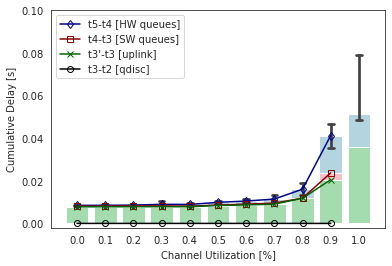

In [58]:
# haha = sns.boxplot( x=df3["chanU"], y=df3["delay"], palette="BuPu_r", showfliers = False);
# haha.set_ylim([0, .05])
# # plt.show()

# tex

# haha = sns.barplot( x=df2["chanU"], y=df2["delay"], palette="BrBG");
# haha.set_ylim([0, .05])
# plt.show()


# haha = sns.barplot( x=df1["chanU"], y=df1["delay"], palette="tab10");
# haha.set_ylim([0, .05])
# plt.show()

# df1 = df1[df1['chanU'] != 1]
# df2 = df2[df2['chanU'] != 1]
# df3 = df3[df3['chanU'] != 1]
# df4 = df4[df4['chanU'] != 1]


df1_metrics = df1_metrics[df1_metrics['all'] != 10]
df2_metrics = df2_metrics[df2_metrics['all'] != 10]
df3_metrics = df3_metrics[df3_metrics['all'] != 10]
df4_metrics = df4_metrics[df4_metrics['all'] != 10]



sns.set_style(style='white') 

haha = sns.barplot( x=df4["chanU"], y=df4["delay"], color="lightblue", capsize=.2, estimator=median);
haha = sns.lineplot(data=df4_metrics, x="all", y="50%", marker="d",ms=6, markerfacecolor="None",
         markeredgecolor='darkblue', markeredgewidth=1, color='darkblue', label="t5-t4 [HW queues]")



haha = sns.barplot( x=df3["chanU"], y=df3["delay"], color="lightpink", ci=None, estimator=median);
haha = sns.lineplot(data=df3_metrics, x="all", y="50%", marker="s",ms=6, markerfacecolor="None",
         markeredgecolor='darkred', markeredgewidth=1, color='darkred', label="t4-t3 [SW queues]")

haha = sns.barplot( x=df2["chanU"], y=df2["delay"], color="xkcd:hospital green", ci=None, estimator=median);
haha = sns.lineplot(data=df2_metrics, x="all", y="50%", marker="x",ms=6, markerfacecolor="None",
         markeredgecolor='darkgreen', markeredgewidth=1, color='darkgreen', label="t3'-t3 [uplink]")

haha = sns.barplot( x=df1["chanU"], y=df1["delay"], color="lightgray", ci=None, estimator=median);
haha = sns.lineplot(data=df1_metrics, x="all", y="50%", marker="o",ms=6, markerfacecolor="None",
         markeredgecolor='k', markeredgewidth=1, color='k', label="t3-t2 [qdisc]")


plt.legend()
plt.xlabel("Channel Utilization [%]")
plt.ylabel("Cumulative Delay [s]")
haha.set_ylim([-.002, .1])
# haha.set_xlim([-.002, 9.2])
plt.savefig(index + "_" + identifier + "_delay_componenets.pdf", bbox_inches='tight')
plt.show()



df4.to_csv(index + 'd4_data.csv')
df3.to_csv(index + 'd3_data.csv')
df2.to_csv(index + 'd2_data.csv')
df1.to_csv(index + 'd1_data.csv')

df4_metrics
df4_metrics.to_csv(index + 'd4_metrics_data.csv')
df3_metrics.to_csv(index + 'd3_metrics_data.csv')
df2_metrics.to_csv(index + 'd2_metrics_data.csv')
df1_metrics.to_csv(index + 'd1_metrics_data.csv')


In [59]:
df4

,chanU,delay,type
0,0.1,0.008608,HWqueues_TxComplete [HW queues]
1,0.2,0.009343,HWqueues_TxComplete [HW queues]
2,0.0,0.008412,HWqueues_TxComplete [HW queues]
3,0.0,0.008533,HWqueues_TxComplete [HW queues]
4,0.1,0.008719,HWqueues_TxComplete [HW queues]
...,...,...,...
653,0.1,0.008458,HWqueues_TxComplete [HW queues]
654,0.2,0.008716,HWqueues_TxComplete [HW queues]
655,0.2,0.008540,HWqueues_TxComplete [HW queues]
656,0.2,0.008401,HWqueues_TxComplete [HW queues]


(0, 0.072)

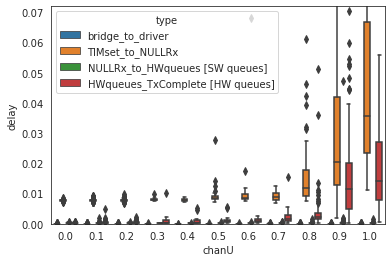

In [60]:
haha = sns.boxplot(x = df['chanU'],
            y = df['delay'],
            hue = df['type'],
            palette = 'tab10')
haha.set_ylim([0, .072])
# plt.xlim([0,10])

In [61]:
len(df[df[df['type'] == 'bridge_to_driver']['chanU'] == .6])

<ipython-input-61-76700bafd098>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df[df['type'] == 'bridge_to_driver']['chanU'] == .6])


68